In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

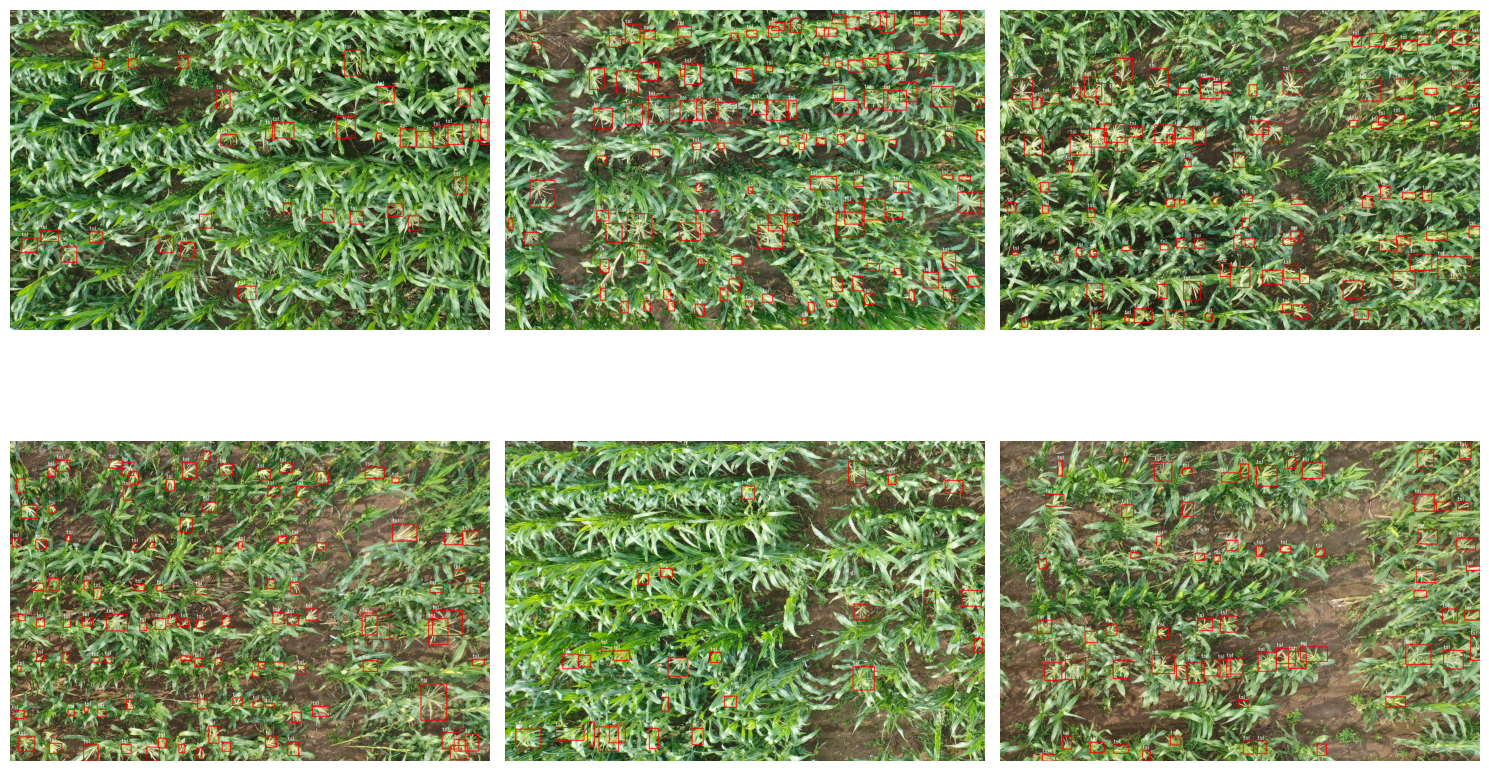

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/images"
labels_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Увеличенная толщина
        font_scale = 1.0  # Увеличенный масштаб шрифта
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=80, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='6_easy_aug',
            batch=32, device=device, seed=69,
            degrees=15,
            flipud=0.2)

New https://pypi.org/project/ultralytics/8.3.114 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=6_easy_aug, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

train: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels.cache... 485 images, 0 backgrounds, 0 corrupt: 100%|██████████| 485/485 [00:00<?, ?it/s]


albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/valid/labels.cache... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to YOLO11s/6_easy_aug/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO11s/6_easy_aug
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      13.4G      4.046      3.014      2.023        557        640: 100%|██████████| 16/16 [00:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all        124       7610      0.148      0.213     0.0995     0.0273


2025-04-23 17:05:00,710 - clearml - INFO - inf value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_inf_value to assign another value

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      12.9G      2.467      1.554      1.167        593        640: 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all        124       7610      0.137      0.562      0.281     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      12.8G      2.309      1.389      1.121        312        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all        124       7610      0.132      0.614      0.316     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      14.2G      2.217      1.325      1.097        435        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all        124       7610      0.405      0.484      0.391      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      12.2G      2.197      1.287      1.078        453        640: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all        124       7610      0.512      0.521      0.453       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      13.9G      2.162      1.248      1.079        363        640: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all        124       7610      0.562      0.496      0.517      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      11.9G      2.106       1.22      1.059        432        640: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all        124       7610       0.37      0.317      0.259     0.0832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      14.1G      2.132      1.205      1.068        267        640: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all        124       7610      0.626      0.561      0.565      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      13.7G      2.086      1.167      1.052        500        640: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        124       7610      0.685      0.586      0.625      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80        11G      2.077      1.162      1.037        529        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all        124       7610      0.724      0.628      0.652       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      15.3G      2.043      1.113      1.038        640        640: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.756      0.622      0.692      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      13.2G      2.056      1.135      1.042        773        640: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610       0.69       0.63      0.648      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      13.3G      2.039      1.122      1.028        524        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.697      0.645      0.654      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      12.9G      2.007       1.09      1.037        383        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610      0.752      0.661      0.707       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      12.9G      2.035      1.099      1.035        423        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610       0.77       0.68      0.723      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      12.6G      2.007      1.104      1.031        363        640: 100%|██████████| 16/16 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        124       7610      0.749      0.656      0.701      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      12.6G      2.005      1.081      1.026        432        640: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610       0.77       0.67      0.732        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      14.5G       1.97      1.049      1.032        440        640: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.787      0.695      0.747       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      13.3G      1.973      1.058      1.022        587        640: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.759      0.671       0.71      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      12.4G      2.002      1.063      1.021        672        640: 100%|██████████| 16/16 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.781      0.661      0.724      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      12.8G      1.952      1.041      1.021        737        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        124       7610      0.788      0.689      0.757      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      11.5G      1.952      1.038       1.02        335        640: 100%|██████████| 16/16 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.785      0.686      0.756      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      15.2G      1.973      1.047      1.012        592        640: 100%|██████████| 16/16 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        124       7610      0.784      0.688      0.753      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      15.3G      1.983      1.041      1.023        573        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.749      0.666      0.726      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      14.7G      1.942      1.026       1.03        461        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.787      0.692      0.759      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      12.2G      1.969      1.025       1.02        507        640: 100%|██████████| 16/16 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.779      0.686      0.749      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      11.8G      1.922      1.014      1.013        338        640: 100%|██████████| 16/16 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610      0.792      0.703      0.767      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      11.4G      1.944      1.012      1.015        742        640: 100%|██████████| 16/16 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.791      0.656      0.744       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      13.2G      1.929      1.017      1.012        487        640: 100%|██████████| 16/16 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.783      0.695       0.76      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      12.9G      1.942      1.005       1.01        624        640: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.743       0.64      0.713      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      12.1G       1.91      1.005      1.013        409        640: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.769      0.684      0.741      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      11.4G      1.902     0.9752      1.006        449        640: 100%|██████████| 16/16 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.756      0.678      0.728      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      13.2G      1.923      1.009      1.011        428        640: 100%|██████████| 16/16 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610       0.78      0.671      0.749      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      14.9G      1.933      1.004      1.002        450        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all        124       7610      0.789      0.724      0.771      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80        15G      1.908     0.9865      1.007        768        640: 100%|██████████| 16/16 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610      0.812      0.704      0.777      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      16.3G      1.929     0.9897      1.013        379        640: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610      0.794      0.696      0.768      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      13.8G      1.914      0.998      1.005        411        640: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.772      0.704      0.758      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      12.4G      1.881     0.9694      1.011        462        640: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.805      0.715      0.782      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      12.9G      1.887     0.9609     0.9977        436        640: 100%|██████████| 16/16 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.791      0.718       0.77      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      14.8G      1.896     0.9761      1.002        672        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.803      0.711      0.775      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      11.7G      1.896     0.9701      1.007        389        640: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.773      0.708      0.763      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      12.3G      1.908     0.9904      1.008        769        640: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all        124       7610      0.793      0.709      0.774      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      11.4G      1.883     0.9586      1.001        386        640: 100%|██████████| 16/16 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all        124       7610      0.811       0.72      0.785      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      11.7G      1.875     0.9622      1.003        394        640: 100%|██████████| 16/16 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.824      0.701       0.78      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      12.7G      1.872     0.9589          1        420        640: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.805      0.722      0.783      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      12.4G      1.859     0.9455     0.9932        463        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all        124       7610      0.789      0.716      0.776      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80        14G      1.877     0.9602      1.006        350        640: 100%|██████████| 16/16 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.806      0.726      0.794      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      11.8G      1.859      0.947          1        533        640: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.811      0.707      0.787      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      12.7G      1.884     0.9615      1.004        492        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        124       7610      0.786      0.712      0.772      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      11.5G      1.887     0.9725      1.005        593        640: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610      0.804      0.717      0.788      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80        12G      1.865      0.939      0.991        430        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.779      0.707      0.763      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      12.2G      1.877     0.9463      1.003        546        640: 100%|██████████| 16/16 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        124       7610      0.803      0.712      0.772      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80        14G      1.866     0.9365     0.9962        430        640: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.776      0.704       0.76      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      11.1G      1.862     0.9366      1.001        561        640: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all        124       7610      0.813      0.712      0.786      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      11.3G      1.855     0.9332      1.004        399        640: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610       0.81      0.713      0.783      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      13.3G      1.857     0.9355      1.003        393        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all        124       7610      0.811       0.71      0.786       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      13.2G      1.864     0.9332     0.9966        664        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all        124       7610      0.808      0.711      0.787      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      10.5G      1.861     0.9347     0.9926        483        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        124       7610       0.82      0.719      0.782      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      13.4G      1.853      0.917     0.9956        345        640: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.803      0.718      0.785      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80        14G      1.859     0.9342     0.9941        541        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.816      0.731      0.799      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      11.6G      1.854     0.9343      1.002        363        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.799      0.724      0.782      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      13.8G      1.864     0.9359      0.999        468        640: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all        124       7610       0.82      0.726      0.803      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      12.3G      1.853     0.9233     0.9904        545        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.827      0.731      0.797      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      13.6G      1.846     0.9218     0.9821        470        640: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610        0.8      0.727      0.793      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      12.9G      1.813     0.8915     0.9916        447        640: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.816      0.717      0.793       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      13.5G      1.832     0.9108     0.9902        407        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.809      0.721      0.791      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      13.1G      1.859     0.9273     0.9885        494        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610      0.801      0.723      0.788      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      15.1G      1.827     0.9084     0.9824        421        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610        0.8      0.732      0.791      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      12.6G      1.842     0.9118      0.991        578        640: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.817      0.725      0.794      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      13.7G      1.814     0.8879     0.9939        471        640: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all        124       7610      0.806      0.735      0.795      0.356


Closing dataloader mosaic
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      10.9G      1.852     0.9873       1.02        308        640: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.813       0.72      0.785      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      9.21G      1.804     0.9125      1.009        265        640: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.819      0.715      0.793      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      10.3G       1.79     0.9018      1.007        164        640: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.814      0.727      0.797      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      9.41G      1.764     0.8754      1.007        268        640: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all        124       7610      0.815      0.732      0.792      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80       8.8G      1.786      0.884     0.9966        255        640: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        124       7610      0.817      0.718       0.79      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      9.87G      1.788     0.8938      0.995        339        640: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.816      0.721      0.789      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      8.98G      1.775     0.8871      1.005        157        640: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all        124       7610      0.814      0.723      0.793       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      10.5G      1.768     0.8692     0.9984        374        640: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.816      0.715      0.791      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      9.48G      1.763     0.8728     0.9995        361        640: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.818      0.722      0.793      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      8.81G      1.753      0.862     0.9966        248        640: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.816      0.722      0.792      0.356



80 epochs completed in 0.122 hours.
Optimizer stripped from YOLO11s/6_easy_aug/weights/last.pt, 19.2MB
Optimizer stripped from YOLO11s/6_easy_aug/weights/best.pt, 19.2MB

Validating YOLO11s/6_easy_aug/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]


                   all        124       7610      0.819      0.727      0.803      0.365
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to YOLO11s/6_easy_aug


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f170c74ccd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

2025-04-23 17:12:29,427 - clearml.storage - INFO - Uploading: 18.27MB to YOLO11s/6_easy_aug/weights/best.pt


███████████████████████████████ 100% | 18.27/18.27 MB [00:01<00:00, 15.56MB/s]: /home/user/.local/lib/python3.10/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
███████████████████████████████ 100% | 18.27/18.27 MB [00:01<00:00, 12.70MB/s]: 

2025-04-23 17:12:30,878 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLO11s/6_easy_aug.410f0e51289b4460a1fb49ca8230d453/models/best.pt


In [6]:
df = pd.read_csv('YOLO11s/6_easy_aug/results.csv')

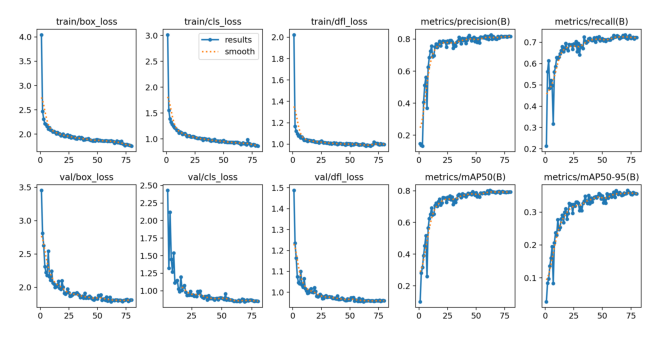

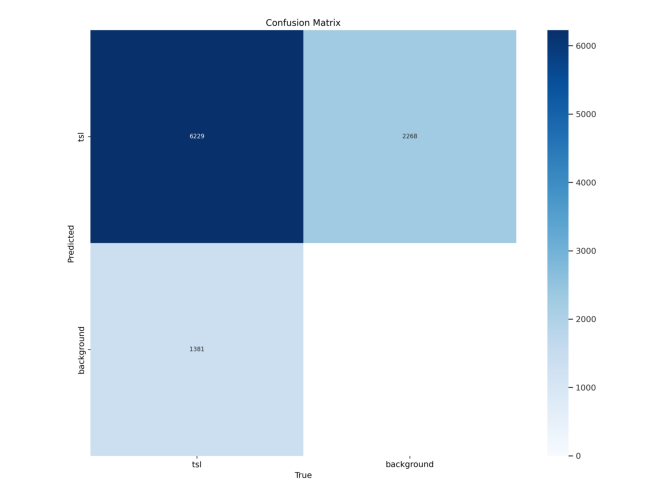

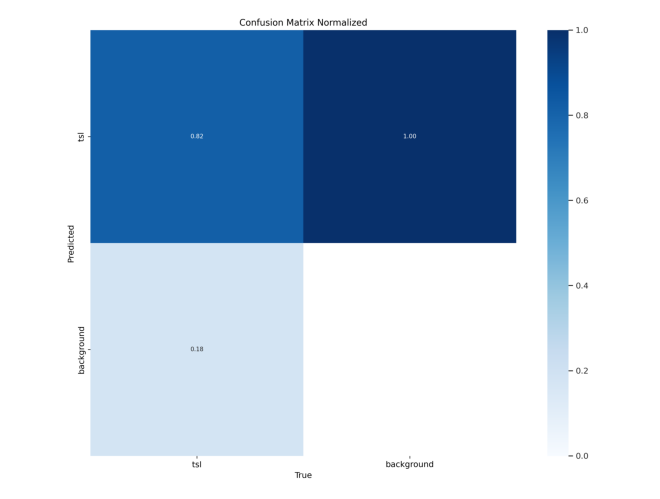

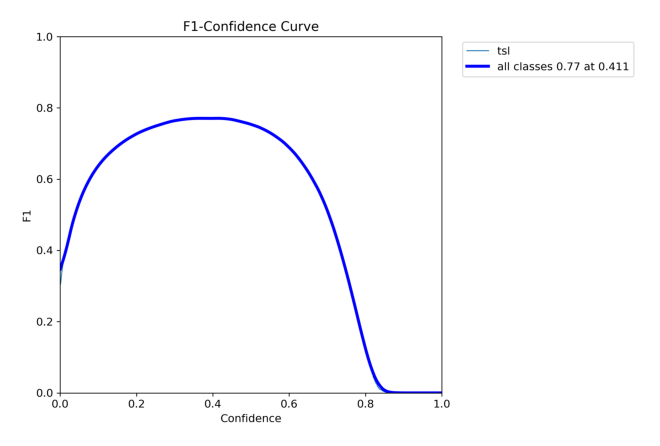

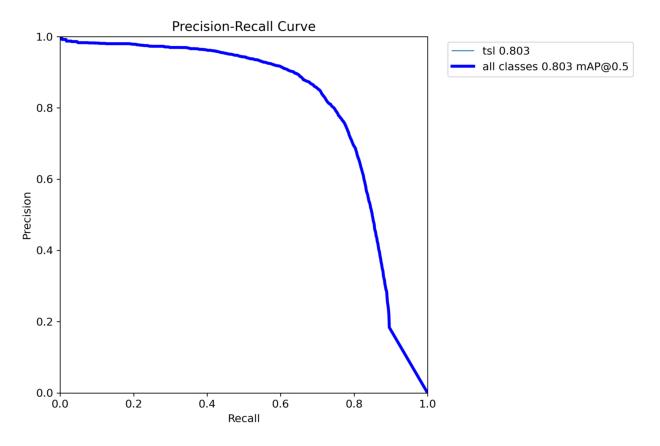

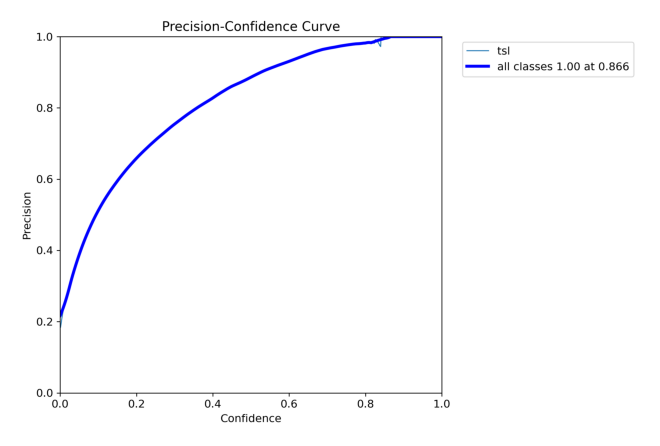

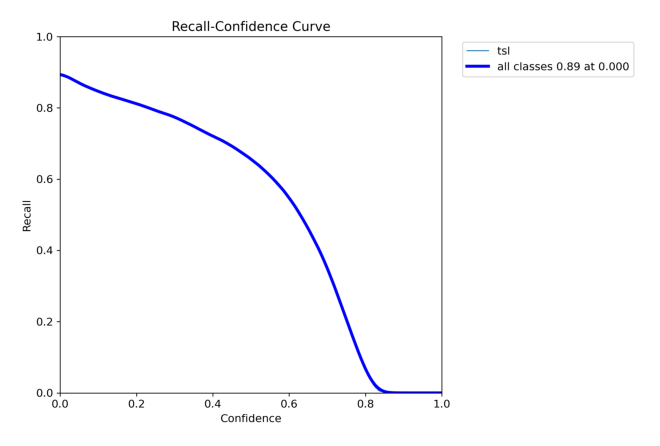

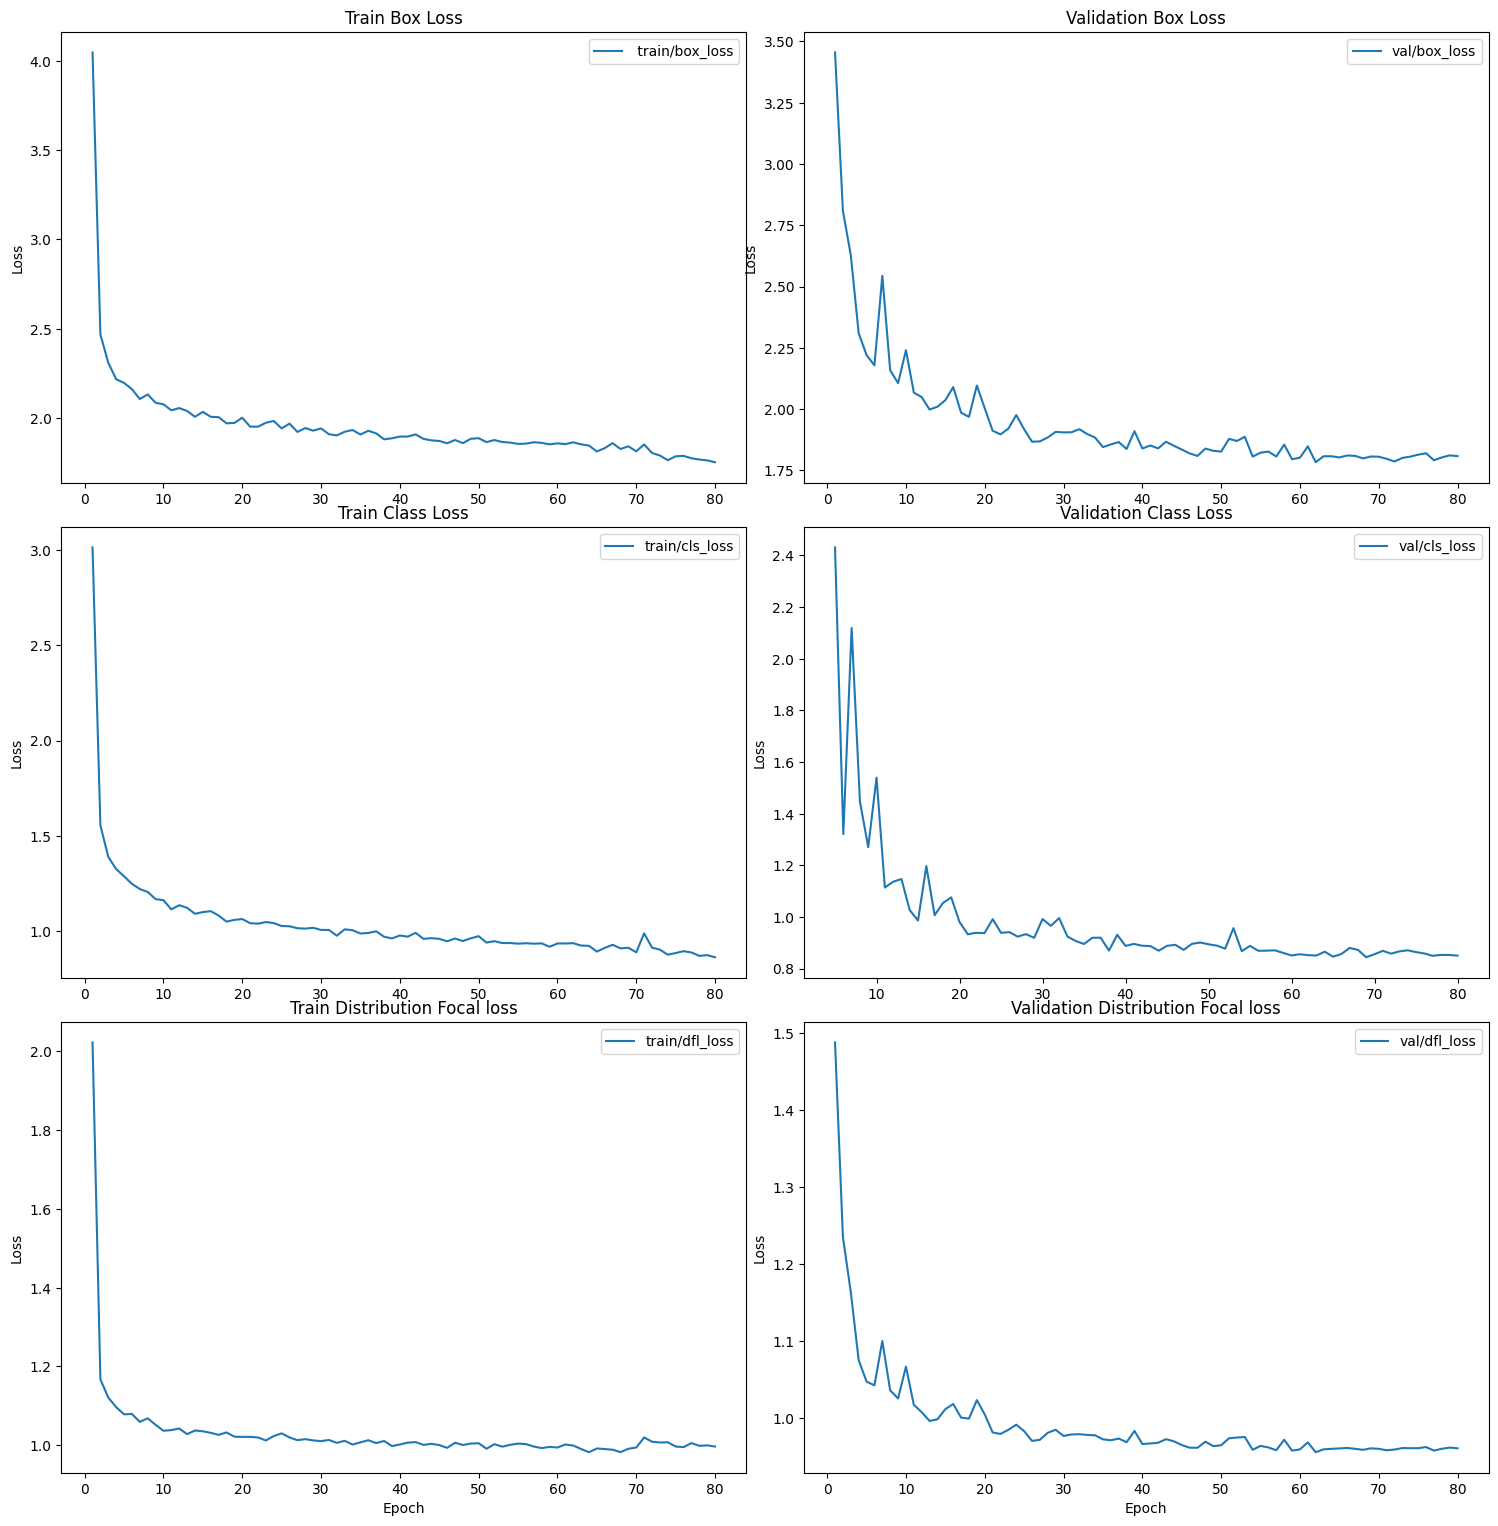

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

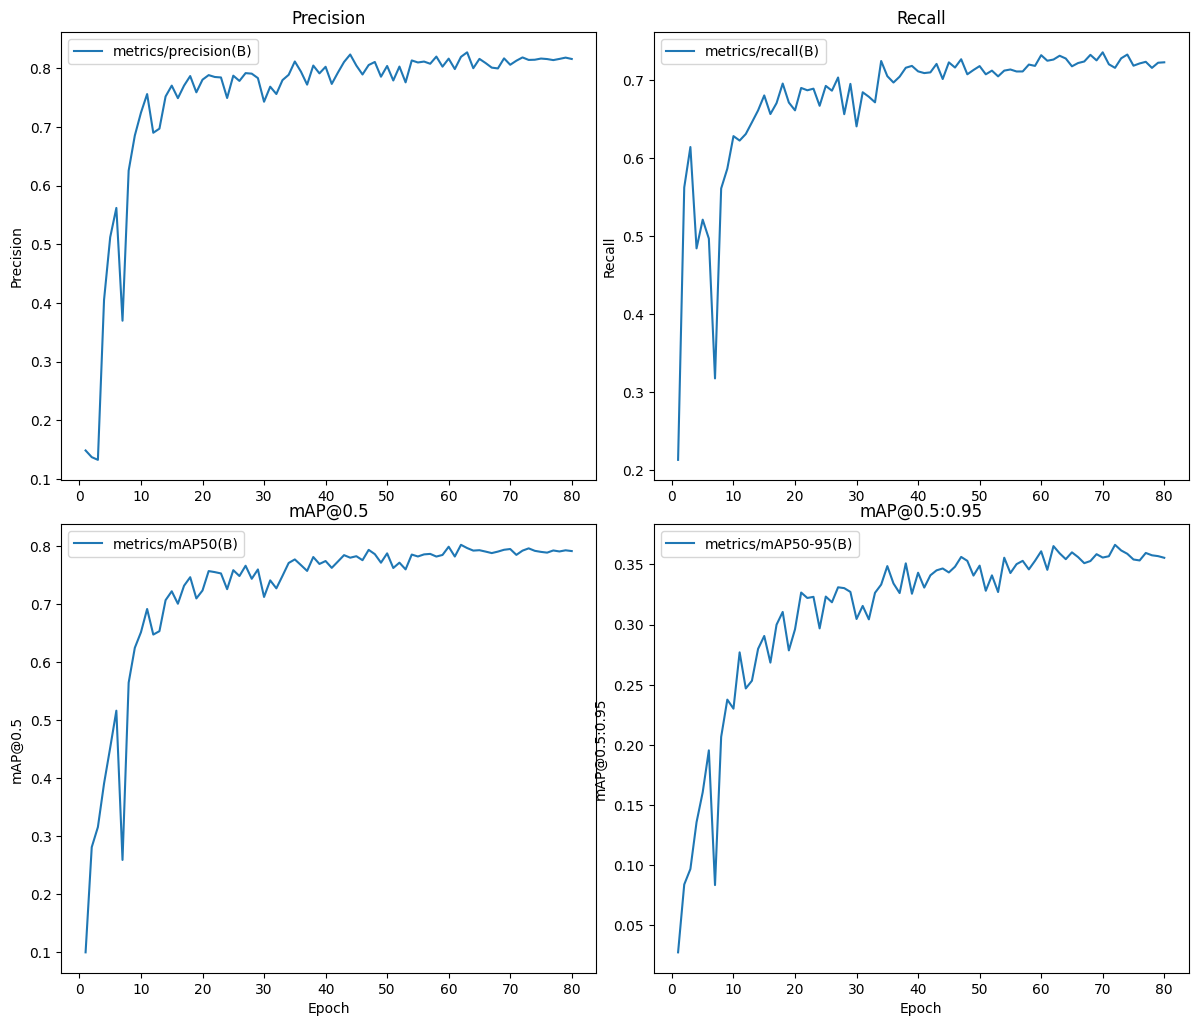

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

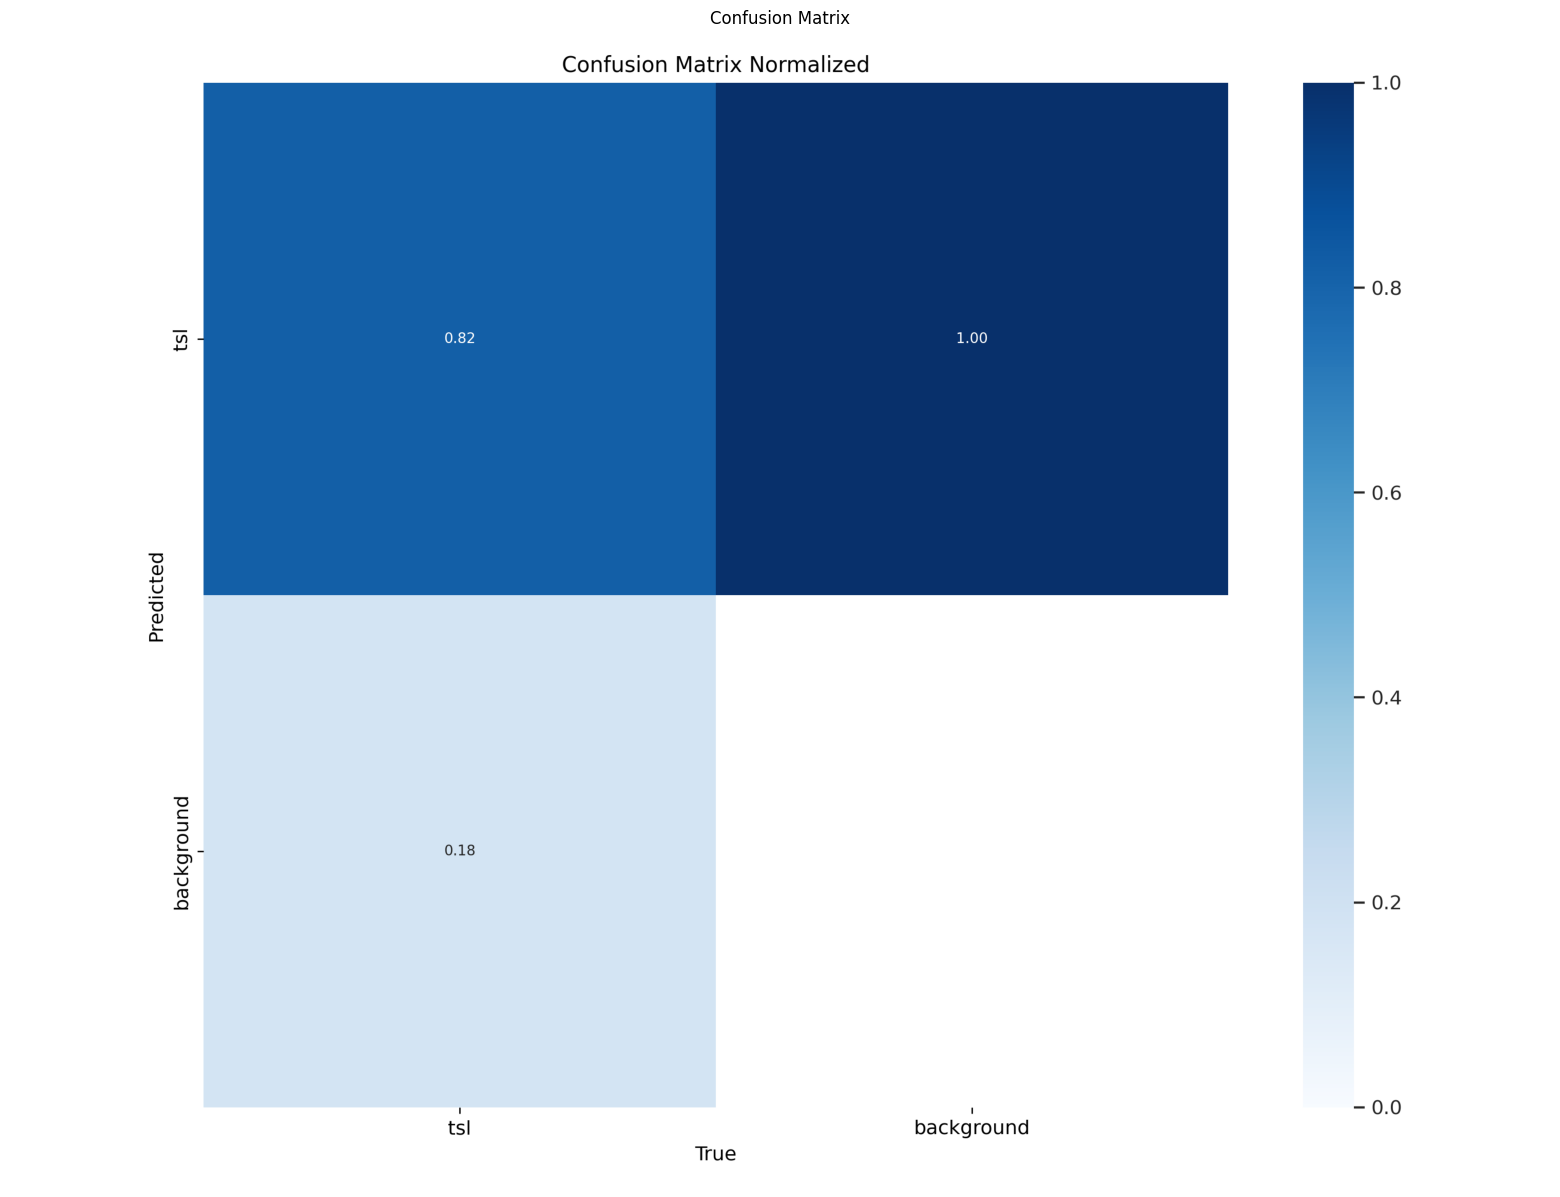

In [9]:
confusion_matrix = Image.open("YOLO11s/6_easy_aug/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg: 448x640 46 tsls, 80.1ms
Speed: 2.1ms preprocess, 80.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


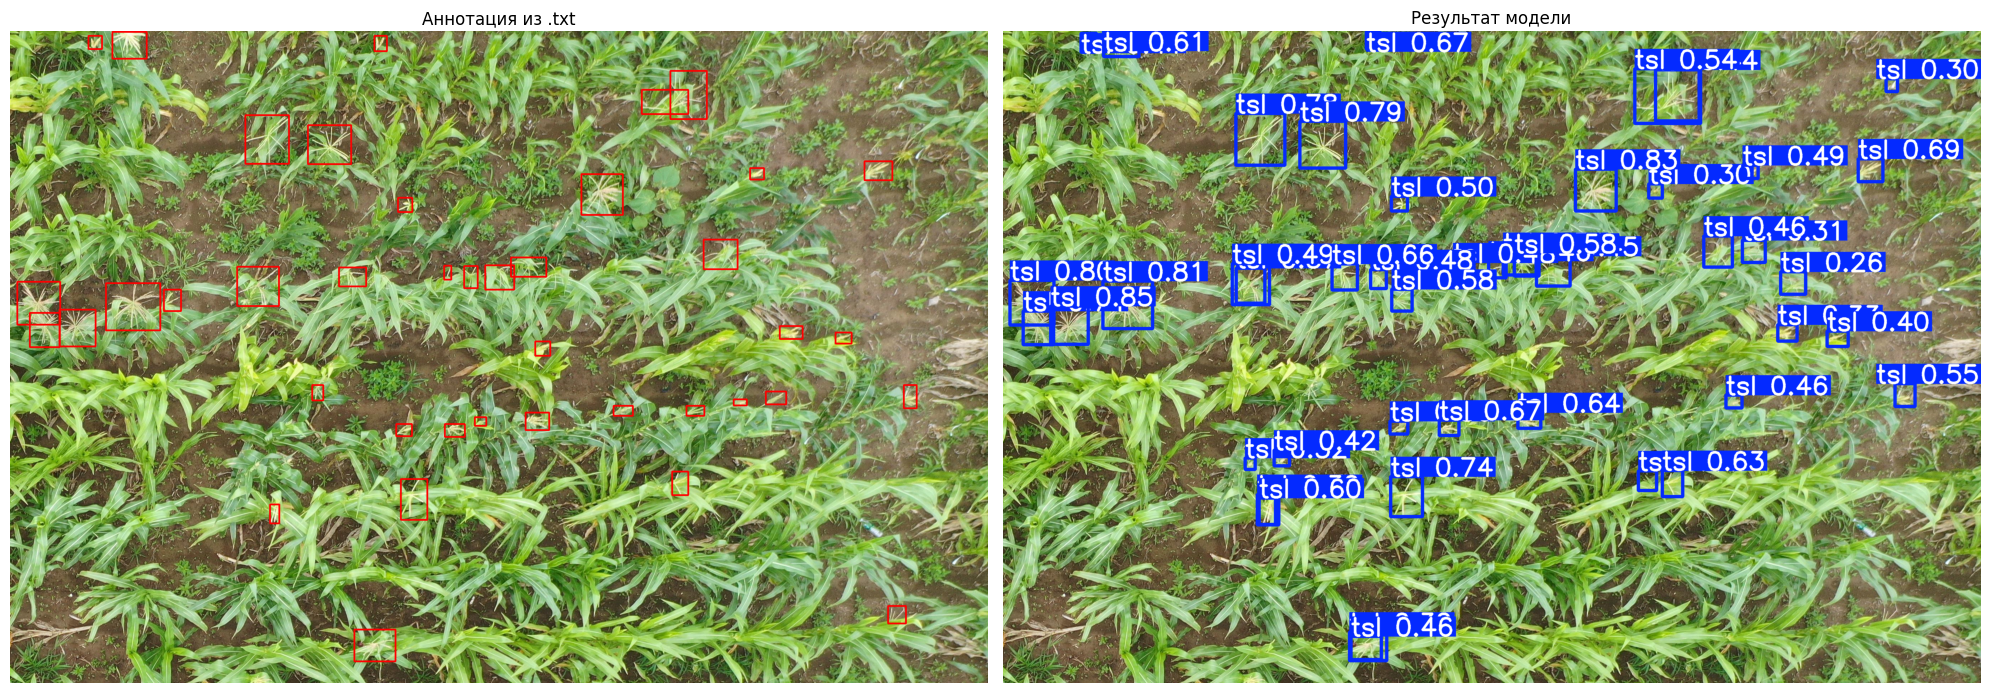

In [10]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = '/home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg'
label_path = image_path.replace('/images/', '/labels/').replace('.jpg', '.txt')

# Загружаем оригинальное изображение
orig_img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
height, width = orig_img.shape[:2]

# Загружаем аннотации
with open(label_path, 'r') as f:
    boxes = f.readlines()

# Рисуем боксы
for box in boxes:
    cls, x_center, y_center, w, h = map(float, box.strip().split())
    x1 = int((x_center - w / 2) * width)
    y1 = int((y_center - h / 2) * height)
    x2 = int((x_center + w / 2) * width)
    y2 = int((y_center + h / 2) * height)
    cv2.rectangle(orig_img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Прогоняем изображение через модель
res = model(image_path)
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

# Отображаем оба изображения
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(orig_img)
axes[0].set_title("Аннотация из .txt")
axes[0].axis('off')

axes[1].imshow(detect_img)
axes[1].set_title("Результат модели")
axes[1].axis('off')

plt.tight_layout()
plt.show()
